This notebook investigates the Total Net Return (i.e. including dividends, after source tax)
of various MSCI factor indices.

Data available at https://www.msci.com/end-of-day-data-search

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def scale_msci(msci, columns='ALL'):
    """Takes a data frame of monthly index values (i.e. not returns)
    and returns the scaled index development, all starting at 1
    and subsetted to the earliest date where all indices are available."""
    if columns == 'ALL':
        columns = msci.columns
        
    returns = msci.pct_change()
    scaled = returns[columns]
    scaled = scaled.dropna()
    scaled = (1+scaled).cumprod()
    return scaled


def annualize_returns(s, periods_per_year=12):
    """
    Given e.g. a pd.Series or pd.DataFrame of monthly returns,
    in the form of 0.03 for a 3% gain,
    this function computes the annualized return for each series
    """
    
    if isinstance(s, pd.Series):
        return (1+s).prod() ** (periods_per_year/len(s)) - 1
    
    elif isinstance(s, pd.DataFrame):
        # Check it out, we're recursive!
        return s.aggregate(annualize_returns)


def annualize_vol(s, periods_per_year=12):
    if isinstance(s, pd.Series):
        return s.std() * (periods_per_year**0.5)
    elif isinstance(s, pd.DataFrame):
        return s.aggregate(annualize_vol)



In [34]:
msci = pd.read_csv("MSCI Factors Net Return.csv", thousands=",", index_col=0, parse_dates=True)
msci.columns = msci.columns.str.strip()
msci = msci.rename(columns={
    'EM (EMERGING MARKETS) Standard (Large+Mid Cap)': 'Emerging Markets',
    'WORLD MOMENTUM Standard (Large+Mid Cap) Momentum': 'Momentum',
    'WORLD QUALITY Standard (Large+Mid Cap) Quality': 'Quality',
    'WORLD SMALL CAP Small Cap': 'Small Cap',
    'WORLD VALUE Standard (Large+Mid Cap) Value': 'Value',
    'WORLD Standard (Large+Mid Cap)': 'MSCI World'
})
msci.tail()

,Emerging Markets,Momentum,Quality,Small Cap,Value,MSCI World
Date,,,,,,
2019-11-29,490.93,1296.16,1366.82,500.85,9522.66,6708.68
2019-12-31,527.55,1328.06,1416.45,518.19,9812.39,6909.66
2020-01-31,502.96,1363.01,1424.30,503.80,9525.37,6867.60
2020-02-28,476.44,1265.20,1313.97,457.48,8609.92,6287.12
2020-03-31,403.06,1135.91,1199.65,362.42,7166.52,5455.06


In [5]:
returns = msci.pct_change().dropna()  # dropna: Take only months where all data is available
returns.index.to_period('M')
returns.head()  # This starts at 2001-01-01

,Emerging Markets,Momentum,Quality,Small Cap,Value,MSCI World
Date,,,,,,
2001-01-31,0.137600,-0.044307,0.007708,0.037100,0.010046,0.019259
2001-02-28,-0.078411,-0.048321,-0.092578,-0.029120,-0.049087,-0.084626
2001-03-30,-0.098626,-0.057272,-0.069480,-0.055318,-0.051245,-0.065848
2001-04-30,0.049312,0.047004,0.072857,0.078743,0.067282,0.073714
2001-05-31,0.011497,-0.001655,-0.007147,0.010818,-0.006284,-0.013033


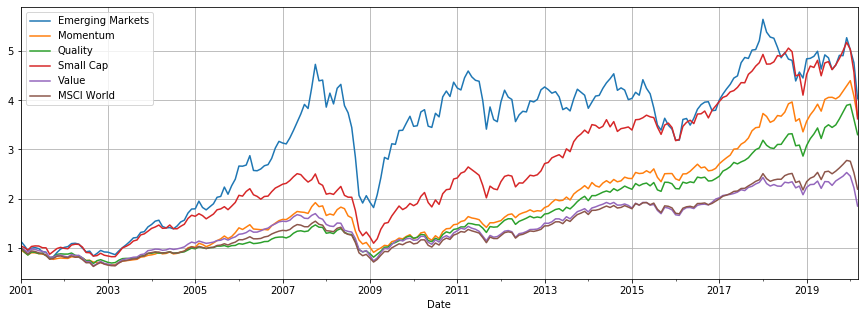

In [41]:
msci_idx = scale_msci(msci)
msci_idx.plot(figsize=(15,5), grid=True)

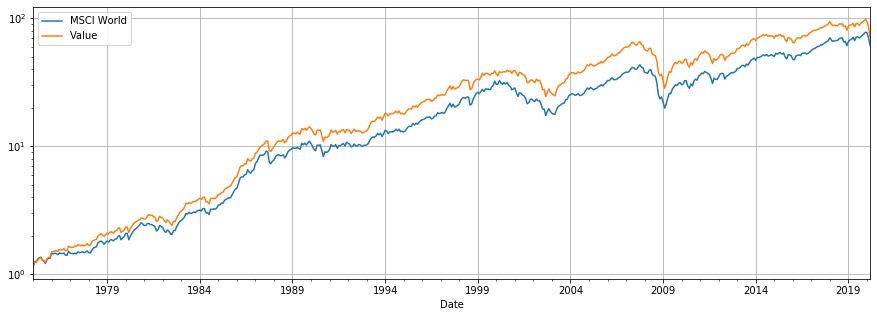

In [49]:
msci_idx = scale_msci(msci, columns=['MSCI World', 'Value'])
msci_idx.plot(figsize=(15,5), grid=True, logy=True)

/home/alexx/.local/lib/python3.6/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


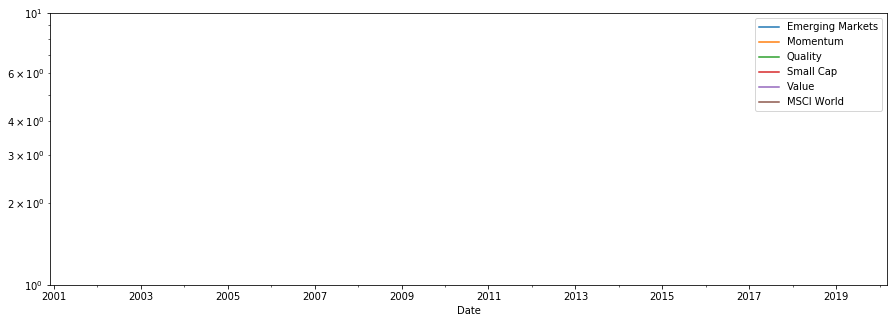

In [26]:
msci_idx.plot(figsize=(15,5), logy=True)

In [6]:
timeframe = str(returns.index[0].date()) + ' to ' + str(returns.index[-1].date())

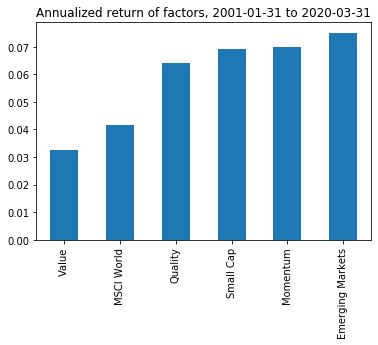

In [7]:
ann_ret = annualize_returns(returns)
ann_ret.sort_values().plot.bar(
    title='Annualized return of factors, ' + timeframe
)

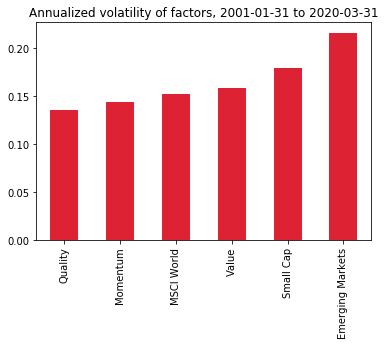

In [8]:
ann_vol = annualize_vol(returns)
ann_vol.sort_values().plot.bar(
    color='#dd2233', title='Annualized volatility of factors, ' + timeframe
)

In [9]:
ret_std = pd.DataFrame({'return': ann_ret, 'std': ann_vol})
ret_std.index.name = 'Index'
ret_std

,return,std
Index,,
Emerging Markets,0.075097,0.216578
Momentum,0.069849,0.144473
Quality,0.064025,0.135406
Small Cap,0.069178,0.179088
Value,0.032438,0.158829
MSCI World,0.041634,0.152857
